# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    if f(x0) == 0:
        return x0, 0
    x1 = x0
    x2 = x1 - f(x1) / fder(x1)
    i = 1
    while abs(x1 - x2) > eps and i <= maxiter:
        x1 = x2
        x2 = x1 - f(x1) / fder(x1)
        i+=1
    return x2, i 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [5]:
def f(x):
    return x**2-1
def fder(x):
    return 2*x

In [10]:
for i in range(10,50,10): 
    print('x0_left=',-i) 
    x1, n1 = newton_iteration(f, fder, -i)
    print('x1= ', x1,'итерации: ',n1)
    print('x0_right =',i) 
    x2, n2 = newton_iteration(f, fder, i)
    print('x2= ', x2,'итерации: ',n1)
    print('')

x0_left= -10
x1=  -1.0000000000139897 итерации:  7
x0_right = 10
x2=  1.0000000000139897 итерации:  7

x0_left= -20
x1=  -1.0000000000149214 итерации:  8
x0_right = 20
x2=  1.0000000000149214 итерации:  8

x0_left= -30
x1=  -1.0000000000000029 итерации:  9
x0_right = 30
x2=  1.0000000000000029 итерации:  9

x0_left= -40
x1=  -1.0000000000151628 итерации:  9
x0_right = 40
x2=  1.0000000000151628 итерации:  9



Число итераций растет, чем дальше начальное приближение, все верно

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [12]:
def mod_newton_iteration(f, fder, m, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    m : integer
        Integer constant for modification of Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    if f(x0) == 0:
        return x0, 0
    x1 = x0
    x2 = x1 - m * f(x1) / fder(x1)
    i = 1
    while abs(x1 - x2) > eps and i <= maxiter:
        x1 = x2
        x2 = x1 - m * f(x1) / fder(x1)
        i+=1
    return x2, i 

In [13]:
def f1(x):
    return (x**2-1)**2
def fder1(x):
    return 4*x*(x**2-1)

In [14]:
for i in range(10,40,10): 
    print('x0=  ',i) 
    for j in range(1, 6):
        print('m =', j)
        x1, n1 = mod_newton_iteration(f1, fder1, j, -i)
        print('x1= ', x1,'итерации: ',n1)
        x2, n2 = mod_newton_iteration(f1, fder1, j, i)
        print('x2= ', x2,'итерации: ',n2)
        print(' ')

x0=   10
m = 1
x1=  -1.0000078664191003 итерации:  24
x2=  1.0000078664191003 итерации:  24
 
m = 2
x1=  -1.0000000000139897 итерации:  7
x2=  1.0000000000139897 итерации:  7
 
m = 3
x1=  -1.0000021115603943 итерации:  17
x2=  1.0000021115603943 итерации:  17
 
m = 4
x1=  -0.09999999999999964 итерации:  1001
x2=  0.09999999999999964 итерации:  1001
 
m = 5
x1=  -2.148980765643676 итерации:  1001
x2=  2.148980765643676 итерации:  1001
 
x0=   20
m = 1
x1=  -1.0000052647805826 итерации:  27
x2=  1.0000052647805826 итерации:  27
 
m = 2
x1=  -1.0000000000149214 итерации:  8
x2=  1.0000000000149214 итерации:  8
 
m = 3
x1=  -0.9999980399025524 итерации:  19
x2=  0.9999980399025524 итерации:  19
 
m = 4
x1=  -0.05000000000000071 итерации:  1001
x2=  0.05000000000000071 итерации:  1001
 
m = 5
x1=  -2.0665742965487977 итерации:  1001
x2=  2.0665742965487977 итерации:  1001
 
x0=   30
m = 1
x1=  -1.0000070024728231 итерации:  28
x2=  1.0000070024728231 итерации:  28
 
m = 2
x1=  -1.0000000000

При m=2 все сходится быстро

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Сделаем оценку

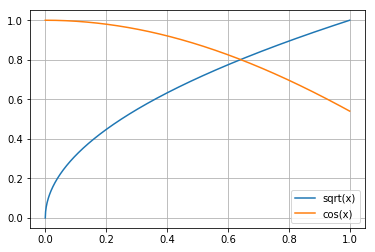

In [16]:
x = np.linspace(0, 1, 1000)
plt.plot(x, np.sqrt(x), label='sqrt(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.grid(True)
plt.legend()

In [17]:
def fixed_point_iteration(f, x0, a, eps=1e-5, maxiter=1000):
    if f(x0) == 0:
        return x0, 0
    x1 = x0
    x2 = x1 - a * f(x1)
    i = 1
    while abs(x1 - x2) > eps and i <= maxiter:
        x1 = x2
        x2 = x1 - a * f(x1)
        i+=1
    return x2, i 

Text(0, 0.5, 'Итерации')

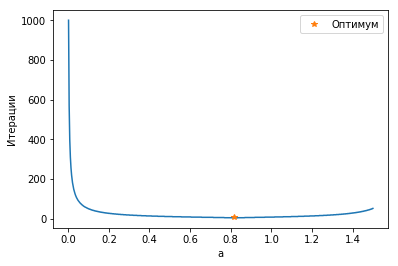

In [22]:
a = np.linspace(0, 1.5, 1000)
iterat = np.zeros(len(a))
j=0
def f(x):
    return x**0.5-np.cos(x)
for i in a:
    iterat[j] = fixed_point_iteration(f,0.6, i)[1]
    j = j+1
    
plt.plot(a[1:], iterat[1:])
a1 = 2/(1/2/math.sqrt(0.6)+math.sin(0.6)+1/2/math.sqrt(0.7)+math.sin(0.7))  #a=2/(m+M)
plt.plot(a1, fixed_point_iteration(f,-1, a1)[1], '*', label='Оптимум' )
plt.legend()
plt.xlabel('а')
plt.ylabel('Итерации')

Оптимум около 0.8

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.